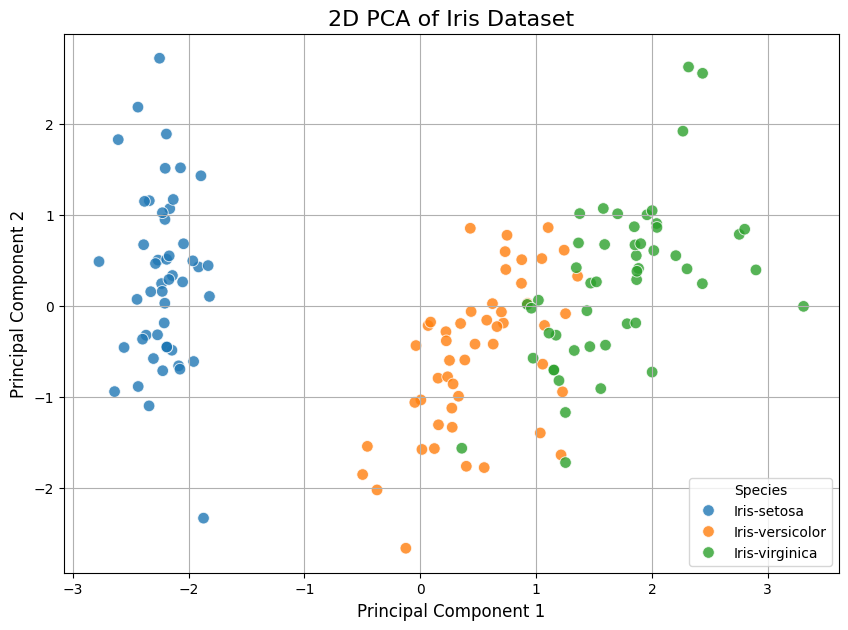

Explained variance ratio per principal component:
[0.72770452 0.23030523]


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("iris.csv")

# Separate features (X) and target (y)
# Drop 'Id' column as it's not a feature for PCA
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components and species
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = y

# Plot the 2D PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Species',
    data=pca_df,
    s=70,  # size of points
    alpha=0.8
)
plt.title('2D PCA of Iris Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Species')
plt.savefig('iris_pca_2d_plot.png')
plt.show()

print("Explained variance ratio per principal component:")
print(pca.explained_variance_ratio_)

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a sample dataset
# Let's create a dataset with 3 features and 3 categories
np.random.seed(42) # for reproducibility
n_samples = 100
n_features = 4
n_classes = 3

# Generate random data for features, with some separation between classes
data = np.random.rand(n_samples, n_features) * 10

# Introduce some clustering for different classes
for i in range(n_classes):
    data[i*n_samples//n_classes : (i+1)*n_samples//n_classes] += i * 5

# Create a 'Category' column
categories = np.repeat(['Category A', 'Category B', 'Category C'], n_samples // n_classes)
sample_df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(n_features)])
sample_df['Category'] = categories

print("Sample Data Head:")
print(sample_df.head())
print("\nSample Data Info:")
print(sample_df.info())

# Separate features (X_sample) and target (y_sample)
X_sample = sample_df.drop('Category', axis=1)
y_sample = sample_df['Category']

# 2. Standardize the features
scaler_sample = StandardScaler()
X_sample_scaled = scaler_sample.fit_transform(X_sample)

# 3. Apply PCA with 2 components
pca_sample = PCA(n_components=2)
principal_components_sample = pca_sample.fit_transform(X_sample_scaled)

# Create a DataFrame with the principal components and categories
pca_sample_df = pd.DataFrame(data=principal_components_sample,
                             columns=['Principal Component 1', 'Principal Component 2'])
pca_sample_df['Category'] = y_sample

# 4. Plot the 2D PCA for sample data
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Category',
    data=pca_sample_df,
    s=70,
    alpha=0.8
)
plt.title('2D PCA of Sample Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Category')
plt.savefig('sample_data_pca_2d_plot.png')
plt.show()

print("\nExplained variance ratio per principal component for Sample Data:")
print(pca_sample.explained_variance_ratio_)

ValueError: Length of values (99) does not match length of index (100)